In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
data = pd.read_csv("./dataset/diabetes.csv")

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [34]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [35]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [36]:
for column in data.columns:
    print(data[column].isnull().sum())

0
0
0
0
0
0
0
0
0


In [50]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [38]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.2, stratify=Y, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [53]:
svm_classifier = svm.SVC(kernel='linear')

In [54]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [55]:
X_train_prediction = svm_classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [56]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [47]:
X_test_prediction = svm_classifier  .predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [48]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [57]:
# Helper function to train, evaluate, and store results
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, Y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_accuracy = accuracy_score(Y_train, train_predictions)
    test_accuracy = accuracy_score(Y_test, test_predictions)
    print(f"{model_name} - Training Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    return train_accuracy, test_accuracy

In [58]:
# Train different models
results = {}
results["Logistic Regression"] = train_and_evaluate_model(LogisticRegression(max_iter=2000), "Logistic Regression")
results["SVM"] = train_and_evaluate_model(svm.SVC(kernel='linear'), "Support Vector Machine")
results["Random Forest"] = train_and_evaluate_model(RandomForestClassifier(n_estimators=100), "Random Forest")
results["Neural Network"] = train_and_evaluate_model(MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500), "Neural Network")


Logistic Regression - Training Accuracy: 0.7834, Test Accuracy: 0.7468
Support Vector Machine - Training Accuracy: 0.7801, Test Accuracy: 0.7597
Random Forest - Training Accuracy: 1.0000, Test Accuracy: 0.7338
Neural Network - Training Accuracy: 0.7932, Test Accuracy: 0.7532


In [59]:
# Plot accuracy results
models = list(results.keys())
train_accuracies = [results[model][0] for model in models]
test_accuracies = [results[model][1] for model in models]

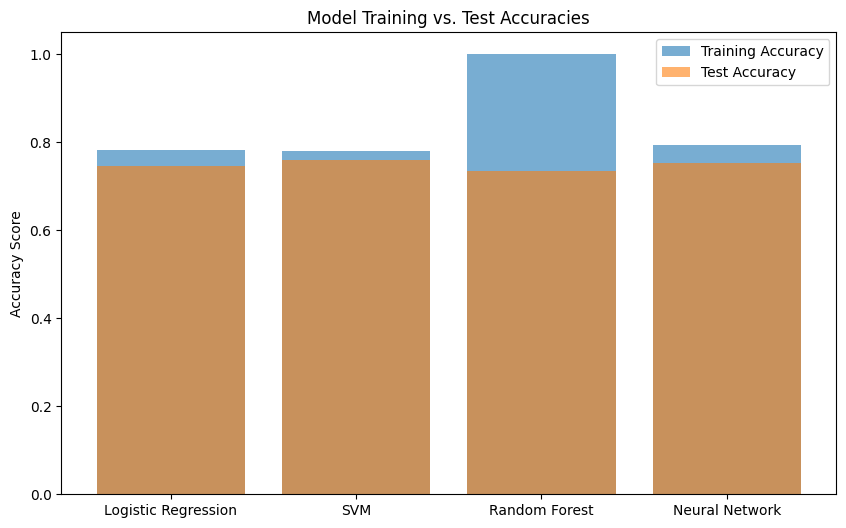

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(models, train_accuracies, alpha=0.6, label='Training Accuracy')
plt.bar(models, test_accuracies, alpha=0.6, label='Test Accuracy')
plt.title("Model Training vs. Test Accuracies")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

In [61]:
# Plot for Neural Network loss and accuracy during training
nn_model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=500, verbose=True)
history = nn_model.fit(X_train, Y_train)

Iteration 1, loss = 0.67433946
Iteration 2, loss = 0.66872817
Iteration 3, loss = 0.66491582
Iteration 4, loss = 0.66205472
Iteration 5, loss = 0.65930779
Iteration 6, loss = 0.65666930
Iteration 7, loss = 0.65369658
Iteration 8, loss = 0.65084035
Iteration 9, loss = 0.64854752
Iteration 10, loss = 0.64642165
Iteration 11, loss = 0.64348992
Iteration 12, loss = 0.64029029
Iteration 13, loss = 0.63638296
Iteration 14, loss = 0.63191193
Iteration 15, loss = 0.62829787
Iteration 16, loss = 0.62508922
Iteration 17, loss = 0.62257419
Iteration 18, loss = 0.61987991
Iteration 19, loss = 0.61678650
Iteration 20, loss = 0.61388651
Iteration 21, loss = 0.61100635
Iteration 22, loss = 0.60775103
Iteration 23, loss = 0.60469839
Iteration 24, loss = 0.60141430
Iteration 25, loss = 0.59867635
Iteration 26, loss = 0.59558808
Iteration 27, loss = 0.59240798
Iteration 28, loss = 0.58897501
Iteration 29, loss = 0.58546705
Iteration 30, loss = 0.58155736
Iteration 31, loss = 0.57935495
Iteration 32, los

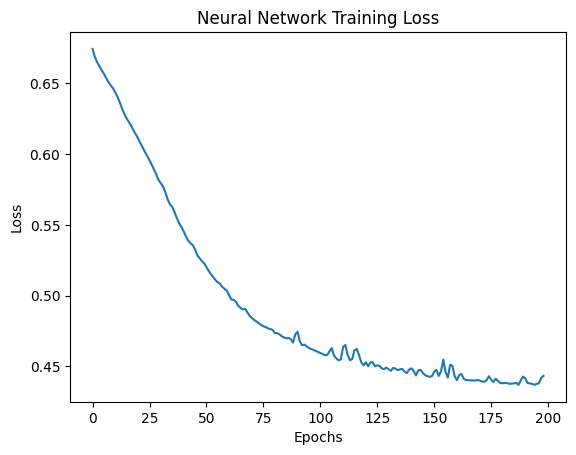

In [62]:
plt.plot(nn_model.loss_curve_)
plt.title("Neural Network Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Hyperparameter Tuning for :Selected model SVM

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = {
    'C': [0.1, 1, 10, 100],  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]  
}

svm_model = svm.SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_svm = grid_search.best_estimator_
test_accuracy = best_svm.score(X_test, Y_test)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.7817006530721045
Test Accuracy with Best Hyperparameters: 0.7727272727272727


### Best for Scikit-learn Models: .joblib

In [65]:
# save the model to saved_models folder for future use
import joblib
joblib.dump(best_svm, "saved_models/best_svm_model.joblib")

['saved_models/best_svm_model.joblib']